In [746]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load, dump
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [738]:
long_trends = pd.read_csv('../data/onlyhurricane.csv')
amo_sst_long = load('../joblib_files/amo_sst_long.joblib')
final_df = load('../joblib_files/updated_final_df.joblib')

In [740]:
long_trends['Hurricanes_Binary'] = long_trends['Cyclone'].apply(lambda x: 1 if x > 0 else 0)
long_trends.drop(columns=['Unnamed: 0', 'Cyclone'], inplace=True)
long_trends = long_trends.merge(amo_sst_long, on='Year', how='left')
long_trends.set_index('Year', inplace=True)
long_trends = long_trends.dropna()
long_trends.rename(columns={'Annual': 'AMO_Anomaly'}, inplace=True)

In [741]:
final_df['Hurricanes_Binary'] =  final_df['Hurricanes'].apply(lambda x: 1 if x > 0 else 0)
final_df = final_df[['Year', 'Hurricanes_Binary', 'AMO_Annual', 'Meridia_slp', 'Bermuda_slp', 'Charleston_slp', 'Nassau_slp']]
final_df.set_index('Year', inplace=True)
final_df

,Hurricanes_Binary,AMO_Annual,Meridia_slp,Bermuda_slp,Charleston_slp,Nassau_slp
Year,,,,,,
1950,1,-0.023750,-1.265806,-1.053978,-1.087527,-1.264086
1951,1,0.187333,-0.765806,0.246022,-0.454194,-0.364086
1952,1,0.278583,0.234194,0.346022,-0.120860,-0.697419
1953,0,0.247417,-0.099140,0.112688,-0.454194,-0.030753
1954,0,0.025750,0.900860,0.446022,-0.120860,0.635914
...,...,...,...,...,...,...
2018,0,0.033500,NaN,NaN,NaN,NaN
2019,1,0.139083,NaN,NaN,NaN,NaN
2020,0,0.268167,NaN,NaN,NaN,NaN


In [742]:
smoothed_amo_long = amo_sst_long['Annual'].rolling(window=2).mean()

In [743]:
#dump(long_trends, '../joblib_files/hu_binary_amo_long.joblib')

In [744]:
long_amo_hurricanes = long_trends[long_trends['Hurricanes_Binary'] == 1]['AMO_Anomaly']
long_amo_no_hurricanes = long_trends[long_trends['Hurricanes_Binary'] == 0]['AMO_Anomaly']

# Perform the t-test
t_stat2, p_value2 = stats.ttest_ind(long_amo_hurricanes, long_amo_no_hurricanes)

# Output the t-statistic and p-value
print("t-statistic:", t_stat2)
print("p-value:", p_value2)

t-statistic: 2.6595781442190876
p-value: 0.0085952210259343


long_trends is going back to 1856

In [701]:
logit_model.predict([1.0, 0.6])

array([0.47728338])

Optimization terminated successfully.
         Current function value: 0.449459
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:      Hurricanes_Binary   No. Observations:                  167
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            1
Date:                Tue, 06 Aug 2024   Pseudo R-squ.:                 0.04543
Time:                        15:39:57   Log-Likelihood:                -75.060
converged:                       True   LL-Null:                       -78.632
Covariance Type:            nonrobust   LLR p-value:                  0.007522
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.6899      0.231     -7.331      0.000      -2.142      -1.238
AMO_Anomaly     2.6650    

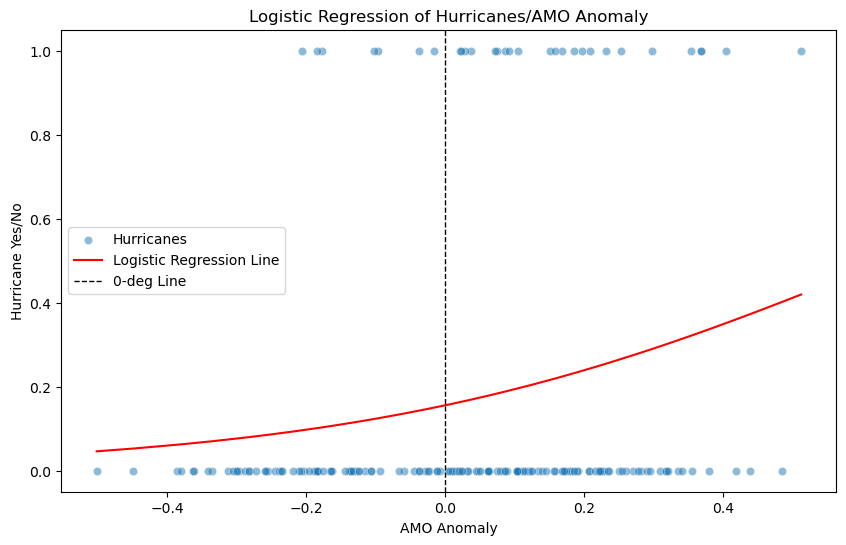

In [685]:
import statsmodels.api as sm

# Prepare the data for logistic regression
X = long_trends['AMO_Anomaly']
y = long_trends['Hurricanes_Binary']

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X).fit()

# Print the summary of the model
print(logit_model.summary())

# Extract predictions
predictions = logit_model.predict(X)

# Visualizations
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AMO_Anomaly', y='Hurricanes_Binary', data=long_trends, label='Hurricanes', alpha=0.5)
sns.lineplot(x=long_trends['AMO_Anomaly'], y=predictions, color='red', label='Logistic Regression Line')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1, label='0-deg Line')
plt.xlabel('AMO Anomaly')
plt.ylabel('Hurricane Yes/No')
plt.title('Logistic Regression of Hurricanes/AMO Anomaly')
plt.legend(loc='center left')
plt.show()


In [698]:
X.describe()

,const,AMO_Anomaly
count,167.0,167.000000
mean,1.0,0.026807
std,0.0,0.213811
min,1.0,-0.501800
25%,1.0,-0.141400
50%,1.0,0.043800
75%,1.0,0.185200
max,1.0,0.512400


In [45]:
#dump(logit_model, '../models/initial_regression_model.joblib')

['../models/initial_regression_model.joblib']

Optimization terminated successfully.
         Current function value: 0.442768
         Iterations 6
Accuracy: 0.7381
Precision: 0.7504
Recall: 0.7381
F1 Score: 0.7438
ROC AUC: 0.6287


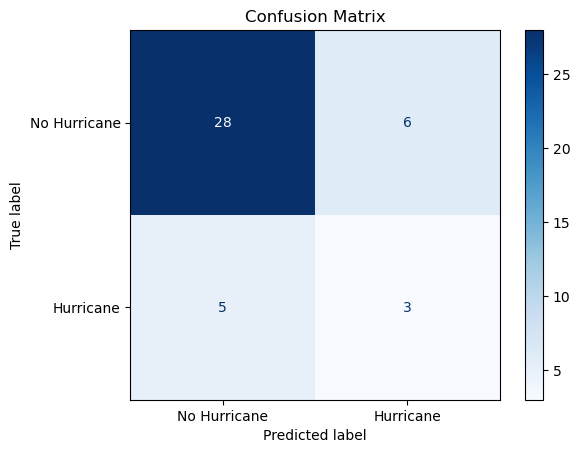

In [555]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

X2 = long_trends['AMO_Anomaly']
y2 = long_trends['Hurricanes_Binary']
X2 = sm.add_constant(X2)

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, stratify=y, random_state=42)

logit_model2 = sm.Logit(y_train2, X_train2).fit()

# Make predictions on the testing set
y_pred_prob = logit_model2.predict(X_test2)
y_pred = (y_pred_prob >= 0.2).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test2, y_pred)
precision = precision_score(y_test2, y_pred, average='weighted')
recall = recall_score(y_test2, y_pred, average='weighted')
f1 = f1_score(y_test2, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test2, y_pred_prob, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test2, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Hurricane', 'Hurricane'])

cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()



Best parameters: {'C': 20, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.5522
Precision: 0.7265
Recall: 0.5522
F1 Score: 0.5935
ROC AUC: 0.6563


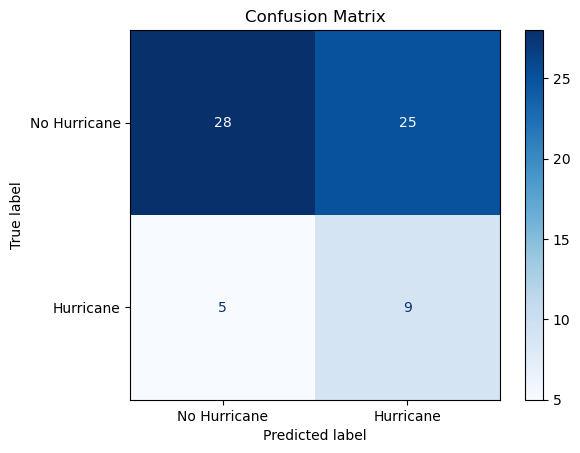

In [363]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the logistic regression model
logit_model = LogisticRegression()

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [20, 100],  # Regularization strength
    'penalty': ['l2'],       # Type of regularization
    'solver': ['liblinear']        # Solver for logistic regression
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logit_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the best model
best_logit_model = grid_search.best_estimator_
best_logit_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred_prob = best_logit_model.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_pred_prob >= 0.15).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_prob, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Hurricane', 'Hurricane'])
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.7353
Precision: 0.2000
Recall: 0.1667
F1 Score: 0.1818
ROC AUC: 0.5625


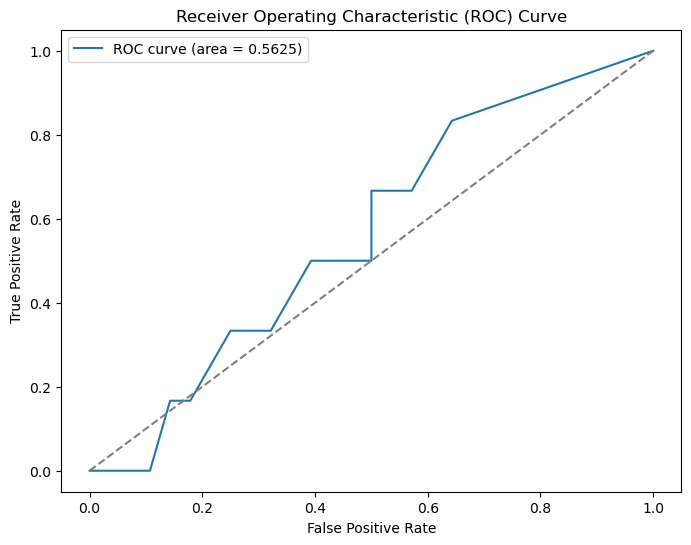

In [636]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred_custom = (y_pred_prob_rf >= 0.4).astype(int)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_custom)
precision_rf = precision_score(y_test, y_pred_custom)
recall_rf = recall_score(y_test, y_pred_custom)
f1_rf = f1_score(y_test, y_pred_custom)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"ROC AUC: {roc_auc_rf:.4f}")

# Plot ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'ROC curve (area = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()


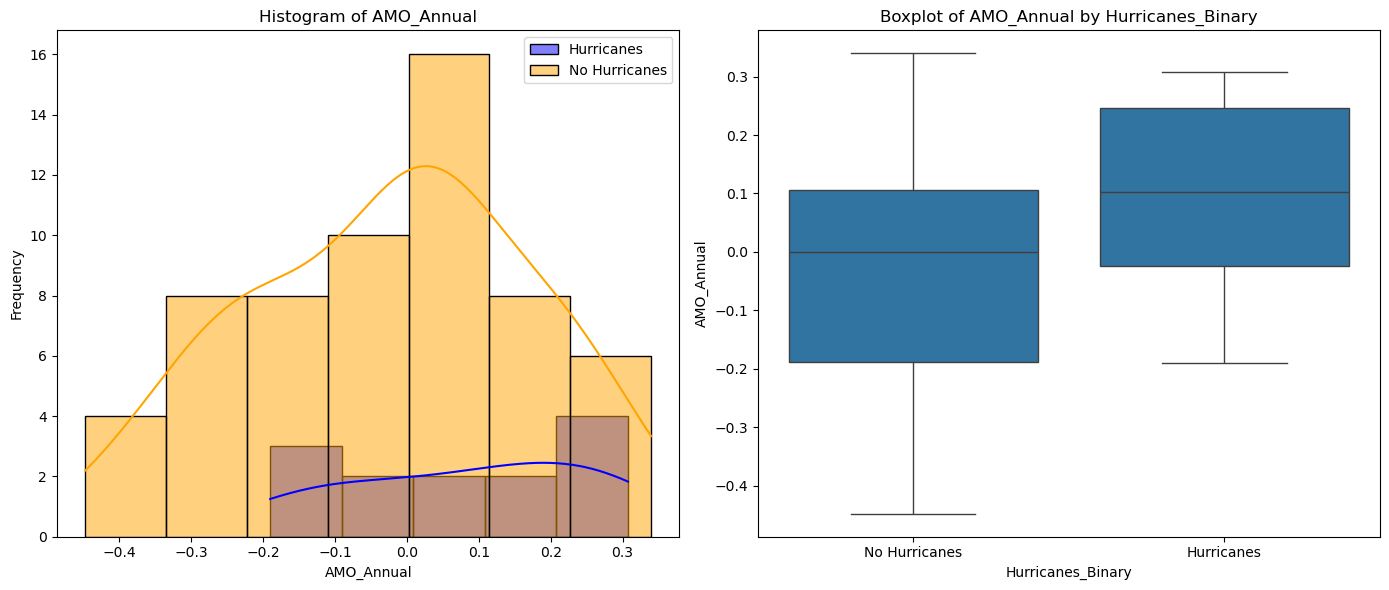

In [48]:
# Create a figure with subplots
plt.figure(figsize=(14, 6))

# Histogram for AMO_Annual values
plt.subplot(1, 2, 1)
sns.histplot(amo_hurricanes, color='blue', label='Hurricanes', kde=True)
sns.histplot(amo_no_hurricanes, color='orange', label='No Hurricanes', kde=True)
plt.title('Histogram of AMO_Annual')
plt.xlabel('AMO_Annual')
plt.ylabel('Frequency')
plt.legend()

# Boxplot for AMO_Annual values
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Hurricanes_Binary', y='AMO_Annual')
plt.title('Boxplot of AMO_Annual by Hurricanes_Binary')
plt.xlabel('Hurricanes_Binary')
plt.ylabel('AMO_Annual')
plt.xticks([0, 1], ['No Hurricanes', 'Hurricanes'])

# Show the plots
plt.tight_layout()
plt.show()

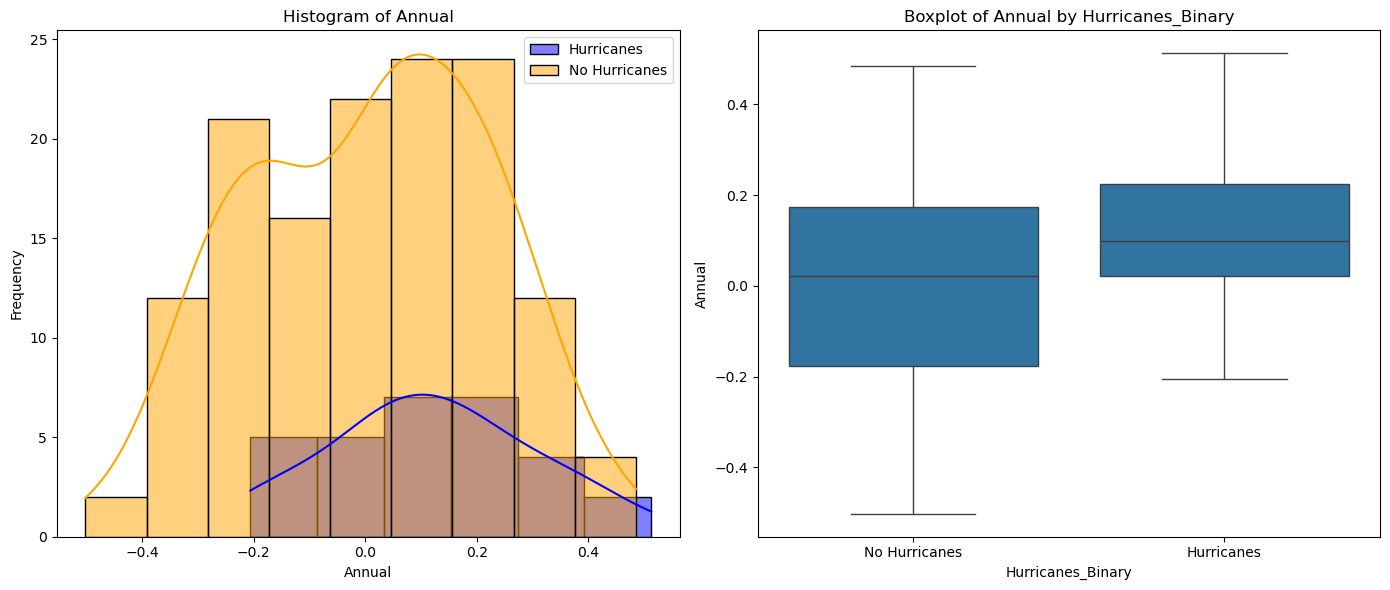

In [107]:
# Create a figure with subplots
plt.figure(figsize=(14, 6))

# Histogram for Annual values
plt.subplot(1, 2, 1)
sns.histplot(long_amo_hurricanes, color='blue', label='Hurricanes', kde=True)
sns.histplot(long_amo_no_hurricanes, color='orange', label='No Hurricanes', kde=True)
plt.title('Histogram of Annual')
plt.xlabel('Annual')
plt.ylabel('Frequency')
plt.legend()

# Boxplot for Annual values
plt.subplot(1, 2, 2)
sns.boxplot(data=long_trends, x='Hurricanes_Binary', y='Annual')
plt.title('Boxplot of Annual by Hurricanes_Binary')
plt.xlabel('Hurricanes_Binary')
plt.ylabel('Annual')
plt.xticks([0, 1], ['No Hurricanes', 'Hurricanes'])

# Show the plots
plt.tight_layout()
plt.show()